In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
rng = np.random.default_rng()
def generate_data(num_pred, num_obs):
    X = rng.standard_normal(size=(num_obs, num_pred))
    y = np.dot(X, rng.standard_normal(size=num_pred)) + rng.normal(loc=0, scale=2, size=num_obs)
    return X, y

def calculate_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return r2_score(y, model.predict(X))

def calculate_adjusted_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return 1 - ((1 - r2_score(y, model.predict(X))) * (len(y) - 1)) / (len(y) - X.shape[1] - 1)

R squared =  0.027688292932229963
R squared adjusted =  0.017766744900926223


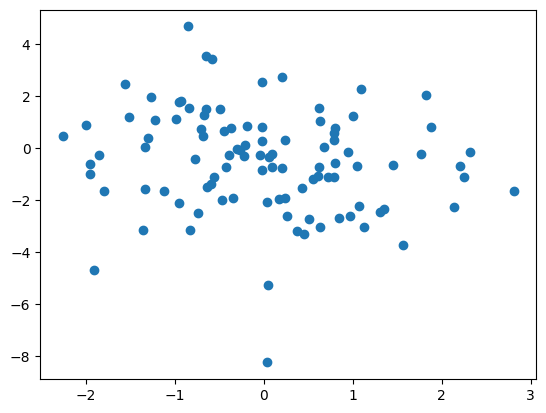

In [41]:
X, y = generate_data(1, 100)
plt.scatter(X, y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

R squared =  0.14124324403916466
R squared adjusted =  0.1377874824457609


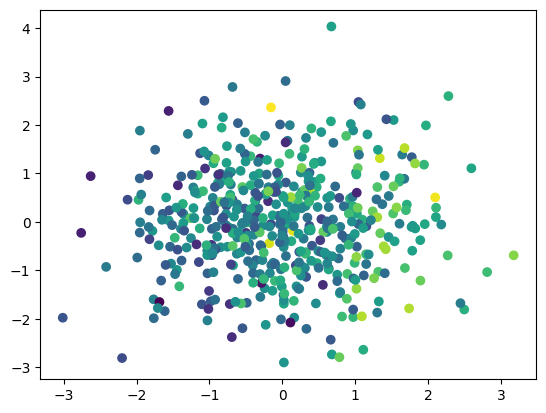

In [42]:
X, y = generate_data(2, 500)
plt.scatter(X[:,0], X[:,1], c=y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

In [43]:
def run_simulations(num_simulations, max_num_predictors, num_observations):
    results = []
    for num_predictors in range(1, max_num_predictors, 2):
        print(num_predictors,'/',max_num_predictors)
        R_squared = []
        for _ in range(num_simulations):
            X, y = generate_data(num_predictors, num_observations)
            R_squared.append(calculate_R_squared(X, y))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

    return results

1 / 75
3 / 75
5 / 75
7 / 75
9 / 75
11 / 75
13 / 75
15 / 75
17 / 75
19 / 75
21 / 75
23 / 75
25 / 75
27 / 75
29 / 75
31 / 75
33 / 75
35 / 75
37 / 75
39 / 75
41 / 75
43 / 75
45 / 75
47 / 75
49 / 75
51 / 75
53 / 75
55 / 75
57 / 75
59 / 75
61 / 75
63 / 75
65 / 75
67 / 75
69 / 75
71 / 75
73 / 75


Text(0, 0.5, '$R^2$')

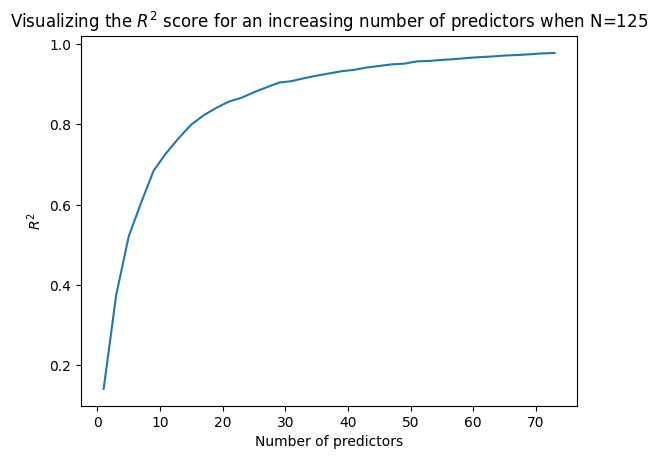

In [46]:
results = run_simulations(num_simulations=400, max_num_predictors=75, num_observations=125)

num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.plot(num_predictors, R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors when N=125')
plt.xlabel('Number of predictors')
plt.ylabel('$R^2$')

1 / 75
3 / 75
5 / 75
7 / 75
9 / 75
11 / 75
13 / 75
15 / 75
17 / 75
19 / 75
21 / 75
23 / 75
25 / 75
27 / 75
29 / 75
31 / 75
33 / 75
35 / 75
37 / 75
39 / 75
41 / 75
43 / 75
45 / 75
47 / 75
49 / 75
51 / 75
53 / 75
55 / 75
57 / 75
59 / 75
61 / 75
63 / 75
65 / 75
67 / 75
69 / 75
71 / 75
73 / 75


Text(0, 0.5, '$R^2$')

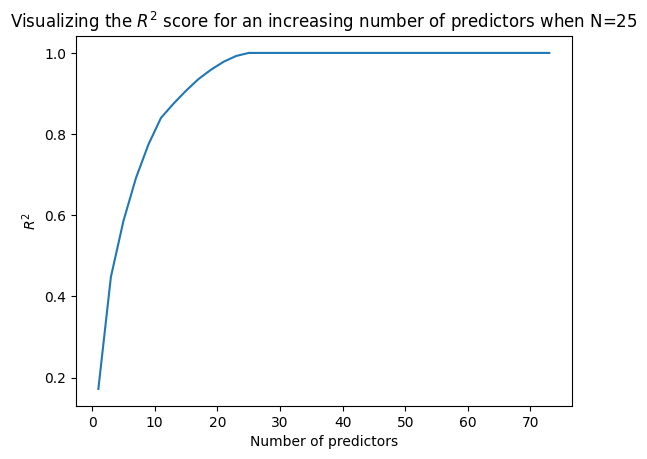

In [47]:
results = run_simulations(num_simulations=400, max_num_predictors=75, num_observations=25)

num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.plot(num_predictors, R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors when N=25')
plt.xlabel('Number of predictors')
plt.ylabel('$R^2$')

In [110]:
num_simulations = 400
max_num_predictors = 50
max_num_observations = 50

results = []
for num_predictors in range(1, max_num_predictors, 2):
    print(num_predictors,'/',max_num_predictors)
    for num_observations in range(2, max_num_observations, 2):
        R_squared = []
        for _ in range(num_simulations):
            X, y = generate_data(num_predictors, num_observations)
            R_squared.append(calculate_R_squared(X, y))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

1 / 50
3 / 50
5 / 50
7 / 50
9 / 50
11 / 50
13 / 50
15 / 50
17 / 50
19 / 50
21 / 50
23 / 50
25 / 50
27 / 50
29 / 50
31 / 50
33 / 50
35 / 50
37 / 50
39 / 50
41 / 50
43 / 50
45 / 50
47 / 50
49 / 50


Text(0, 0.5, 'Number of observations')

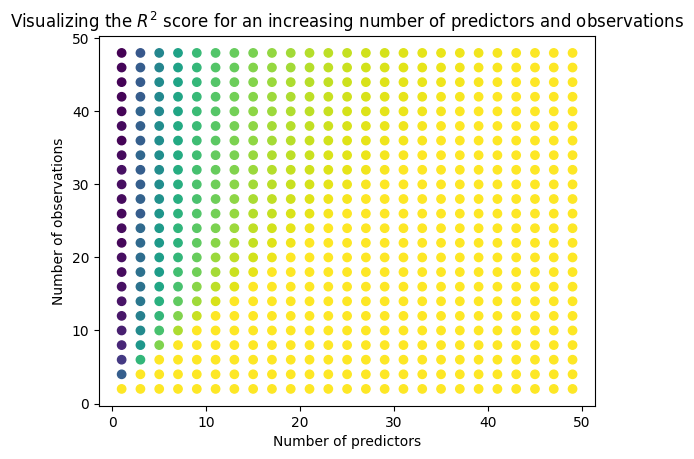

In [111]:
num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.scatter(num_predictors, num_observations, c=R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors and observations')
plt.xlabel('Number of predictors')
plt.ylabel('Number of observations')

In [112]:
unique_x, indices_x = np.unique(num_predictors, return_inverse=True)
unique_y, indices_y = np.unique(num_observations, return_inverse=True)

# Create a 2D grid for Z values using unique X and Y indices
Z_grid = np.empty((len(unique_y), len(unique_x)))
Z_grid.fill(np.nan)  # Fill the grid with NaNs initially

# Fill the Z values at corresponding indices
Z_grid[indices_y, indices_x] = R_squared

In [113]:
Z_grid

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.40940721, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.30131132, 0.71364899, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.

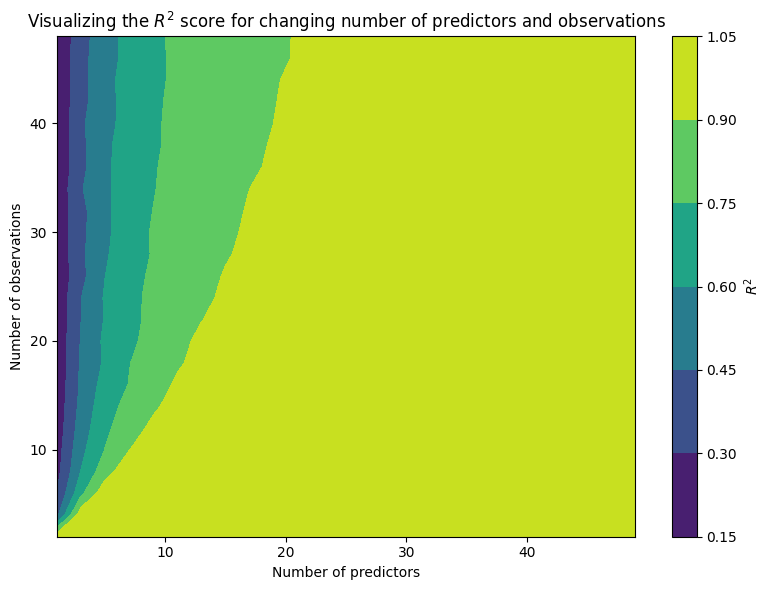

In [114]:
plt.figure(figsize=(8, 6))
contour_plot = plt.contourf(unique_x, unique_y, Z_grid, cmap='viridis')  # Use contourf for filled contours
colorbar = plt.colorbar(contour_plot, label='$R^2$')  # Add colorbar

plt.xlabel('Number of predictors')
plt.ylabel('Number of observations')
plt.title('Visualizing the $R^2$ score for changing number of predictors and observations')
plt.tight_layout()
plt.show()